<a href="https://colab.research.google.com/github/anu04596/DeepLearningTuotorial/blob/main/Day11(Augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt

Augmentated Transforms

In [2]:
train_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(224,padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

Dataset

In [11]:
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=train_transform)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=test_transform)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=2)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=False,num_workers=2)
classes = trainset.classes

Resnet18 model

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [5]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=models.resnet18(pretrained=True)
model.fc=nn.Linear(model.fc.in_features,10)
model=model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 222MB/s]


Loss and optimizer

In [6]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

Training

In [8]:
for epoch in range(2):
  running_loss=0
  for images,labels in trainloader:
    images,labels=images.to(device),labels.to(device)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()

  print(f"Epoch {epoch+1} Loss {running_loss/len(trainloader)}")

Epoch 1 Loss 0.43304844263493253
Epoch 2 Loss 0.32701169011537984


Testing

In [9]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy with Augmentation: {100 * correct / total:.2f}%")


Test Accuracy with Augmentation: 89.25%


Visualize Predictions

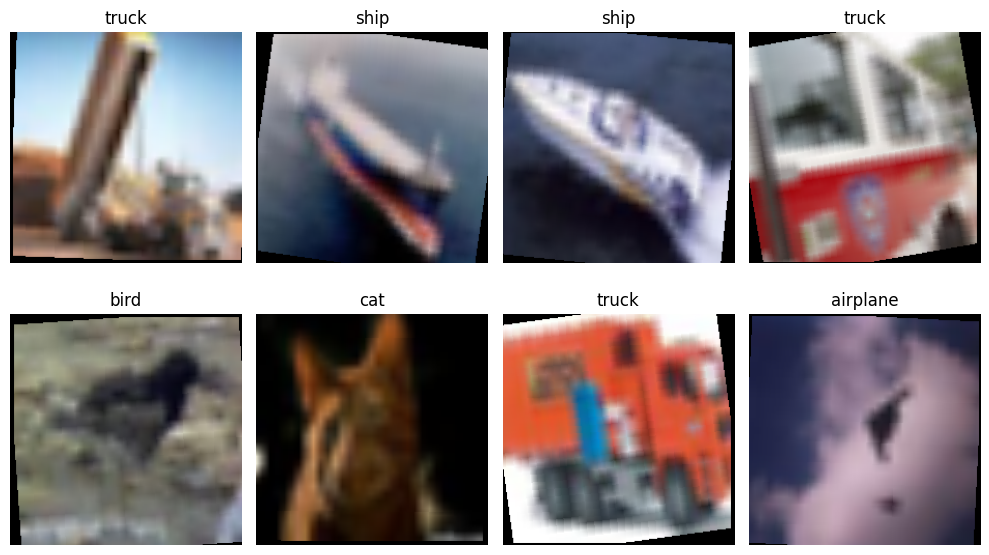

In [12]:
def show_augmented_images():
    dataiter = iter(trainloader)
    images, labels = next(dataiter)
    plt.figure(figsize=(10, 6))
    for i in range(8):
        img = images[i].permute(1, 2, 0) * 0.5 + 0.5
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_augmented_images()
